# Spatial Pipeline Speed Test

In [1]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.graph import receptive_fields, fill_features

def pipeline(image, segmentation_algorithm, node_size):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, _ = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    t_features = time.process_time() - t_features
     
    t_field = time.process_time()
    fields = receptive_fields(points, adj, node_size, neighborhood_size=25, node_stride=2, delta=(image.shape[0] // 10))
    fill_features(fields, features)
    t_field = time.process_time() - t_field
    
    t_all = t_segmentation + t_adjacency + t_features + t_field
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_features = 100 * t_features / t_all
    p_field = 100 * t_field / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    print('3. Receptive field generation: {:.5f}s, {:.2f}%'.format(t_field, p_field))
    
    plt.bar(range(4), [p_segmentation, p_adjacency, p_features, p_field], color="black")
    plt.ylabel('Percentage')

## Load dataset images

In [3]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 64
Execution time: 0.03059s
0. Segmentation: 0.00619s, 20.23%
1. Adjacency generation: 0.00065s, 2.12%
2. Feature extraction: 0.00282s, 9.21%
3. Receptive field generation: 0.02094s, 68.45%


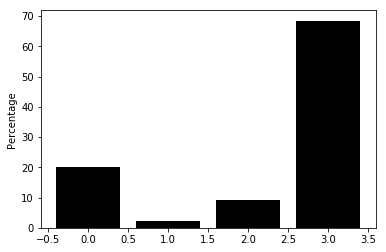

In [5]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic, node_size=40)

## MNIST Quickshift

Number of nodes: 78
Execution time: 0.02400s
0. Segmentation: 0.00493s, 20.54%
1. Adjacency generation: 0.00059s, 2.44%
2. Feature extraction: 0.00278s, 11.60%
3. Receptive field generation: 0.01570s, 65.42%


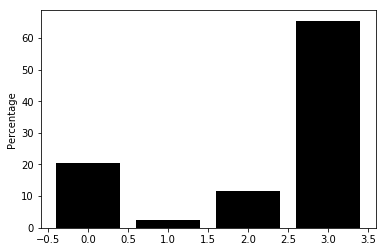

In [6]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift, 45)

## Cifar-10 SLIC

Number of nodes: 234
Execution time: 0.07274s
0. Segmentation: 0.00413s, 5.68%
1. Adjacency generation: 0.00109s, 1.50%
2. Feature extraction: 0.00367s, 5.04%
3. Receptive field generation: 0.06385s, 87.78%


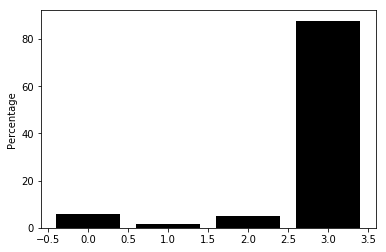

In [7]:
slic = slic_fixed(num_segments=200, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic, 120)

## Cifar-10 Quickshift

Number of nodes: 174
Execution time: 0.04385s
0. Segmentation: 0.00335s, 7.64%
1. Adjacency generation: 0.00079s, 1.79%
2. Feature extraction: 0.00316s, 7.21%
3. Receptive field generation: 0.03655s, 83.36%


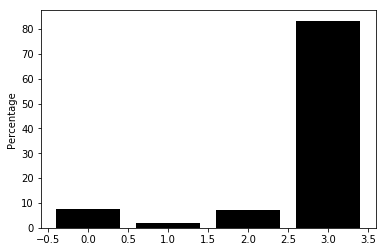

In [8]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift, 100)

## PascalVOC SLIC

Number of nodes: 1454
Execution time: 0.71340s
0. Segmentation: 0.24279s, 34.03%
1. Adjacency generation: 0.02746s, 3.85%
2. Feature extraction: 0.04494s, 6.30%
3. Receptive field generation: 0.39822s, 55.82%


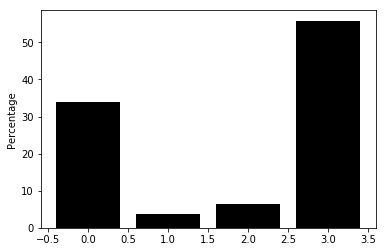

In [9]:
slic = slic_fixed(num_segments=1600, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic, 800)

## PascalVOC Quickshift

Number of nodes: 1784
Execution time: 1.08078s
0. Segmentation: 0.60534s, 56.01%
1. Adjacency generation: 0.04188s, 3.87%
2. Feature extraction: 0.04500s, 4.16%
3. Receptive field generation: 0.38856s, 35.95%


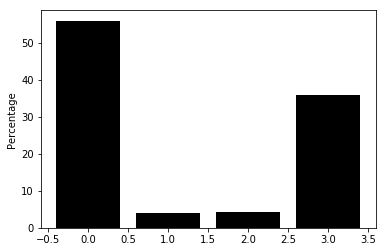

In [10]:
quickshift = quickshift_fixed(ratio=0.75, kernel_size=2, max_dist=8, sigma=0)
pipeline(pascal_voc, quickshift, 1100)